In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('Facebook_metrics_Clustering.csv')

In [3]:
df

,post_type,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
0,Photo,2,12,4,3,0.0,100,1.633028,1.047293,1.056689,0.848498
1,Status,2,12,3,10,0.0,164,1.070536,1.037408,1.070180,0.920614
2,Photo,3,12,3,3,0.0,80,1.566372,1.033991,1.054634,0.773190
3,Photo,2,12,2,10,1.0,1777,2.798734,1.013536,1.066171,0.591867
4,Photo,2,12,2,3,0.0,393,1.636585,1.056605,1.080533,0.902048
...,...,...,...,...,...,...,...,...,...,...,...
491,Photo,3,1,7,2,0.0,84,1.035311,0.958922,0.975163,1.256401
492,Photo,2,1,5,8,0.0,75,1.057087,1.026021,1.058694,1.188572
493,Photo,1,1,5,2,0.0,115,1.092657,1.068155,1.093855,1.160047
494,Photo,3,1,4,11,0.0,136,1.090592,1.036744,1.047004,1.178239


In [4]:
df.corr(numeric_only=True)

,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
category,1.000000,-0.136785,-0.047439,-0.108710,-0.020422,0.129338,0.240760,-0.101223,-0.162692,-0.248906
post_month,-0.136785,1.000000,0.023594,-0.176014,-0.017820,0.021145,0.398458,0.093104,0.073101,-0.382666
post_weekday,-0.047439,0.023594,1.000000,0.046693,-0.003883,-0.082653,-0.075992,-0.005795,-0.024623,0.005006
post_hour,-0.108710,-0.176014,0.046693,1.000000,-0.069849,-0.028847,-0.134386,0.008162,0.024124,0.182699
paid,-0.020422,-0.017820,-0.003883,-0.069849,1.000000,0.104414,0.066793,-0.002231,0.036644,0.048340
total_interactions,0.129338,0.021145,-0.082653,-0.028847,0.104414,1.000000,0.498460,0.080253,0.129706,-0.087395
post_ratio_engaged_consumers,0.240760,0.398458,-0.075992,-0.134386,0.066793,0.498460,1.000000,0.026890,0.038035,-0.389070
post_ratio_imp_reach_log,-0.101223,0.093104,-0.005795,0.008162,-0.002231,0.080253,0.026890,1.000000,0.940571,0.010886
post_ratio_imp_reach_like_log,-0.162692,0.073101,-0.024623,0.024124,0.036644,0.129706,0.038035,0.940571,1.000000,0.009092
post_ratio_engaged_consumption_log,-0.248906,-0.382666,0.005006,0.182699,0.048340,-0.087395,-0.389070,0.010886,0.009092,1.000000


In [5]:
s = StandardScaler()
X = df[['total_interactions','post_ratio_engaged_consumers','post_ratio_imp_reach_log','post_ratio_imp_reach_like_log','post_ratio_engaged_consumption_log']]
X_scaled =  s.fit_transform(X)

#### Explain DBSCAN
1. DBSCAN define some COre and Non-core points
2. Each core point will have some kind of radius and minimum number of Sample
3. To Assign a Cluster you have to Use the Core points
4. So basically core points can extends the cluster while non-core points can't they just can be assigned and thats it
5. If a Point has been Assigned it can't be re assigned to another Cluster

##### Explain Parameter OF DBSCAN
- eps:> Can be referd to as radius of Circle that is used for core points
- min_smaples:> minimum number of samples to make this point as a core point
- metric:> distance that will be used to measure if points are in EPS or Radius

In [6]:
dbscan_model = DBSCAN().fit(X_scaled)
dbscan_model

,eps,0.5
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [10]:
df['cluster'] = dbscan_model.labels_

In [15]:
X_scaled[:10,1]

array([ 1.95210505, -0.51495845,  1.65975522,  7.06484741,  1.96770961,
       -0.34199519,  2.75064277,  4.94169643, -0.44090735,  1.50047016])

In [12]:
df

,post_type,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log,cluster
0,Photo,2,12,4,3,0.0,100,1.633028,1.047293,1.056689,0.848498,0
1,Status,2,12,3,10,0.0,164,1.070536,1.037408,1.070180,0.920614,0
2,Photo,3,12,3,3,0.0,80,1.566372,1.033991,1.054634,0.773190,0
3,Photo,2,12,2,10,1.0,1777,2.798734,1.013536,1.066171,0.591867,-1
4,Photo,2,12,2,3,0.0,393,1.636585,1.056605,1.080533,0.902048,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
491,Photo,3,1,7,2,0.0,84,1.035311,0.958922,0.975163,1.256401,0
492,Photo,2,1,5,8,0.0,75,1.057087,1.026021,1.058694,1.188572,0
493,Photo,1,1,5,2,0.0,115,1.092657,1.068155,1.093855,1.160047,0
494,Photo,3,1,4,11,0.0,136,1.090592,1.036744,1.047004,1.178239,0


In [16]:
df['cluster'].value_counts()

cluster
 0    357
-1    126
 1      7
 2      6
Name: count, dtype: int64

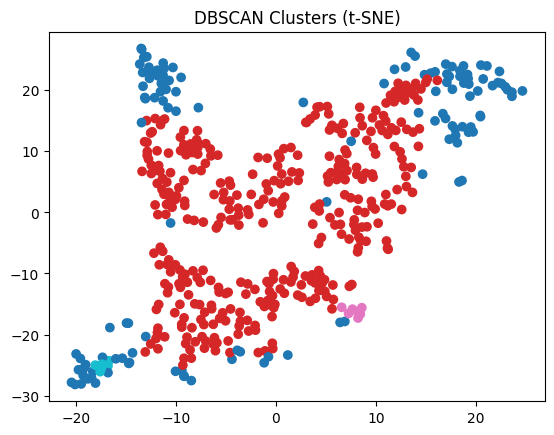

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=dbscan_model.labels_, cmap='tab10')
plt.title('DBSCAN Clusters (t-SNE)')
plt.show()


In [33]:
X_tsne[:,1]

array([ 2.12782135e+01,  8.02478886e+00,  2.11160889e+01,  2.30840931e+01,
        2.13053761e+01,  1.23251162e+01,  2.32101040e+01,  2.41157990e+01,
        9.80342674e+00,  2.03078442e+01,  1.10836353e+01,  2.25424042e+01,
        2.27950745e+01,  2.38711128e+01,  2.39814205e+01,  9.71041870e+00,
        1.54938154e+01,  2.55970116e+01,  2.11322174e+01,  1.79140720e+01,
        1.81135826e+01,  3.75508404e+00,  1.15770855e+01,  1.95239773e+01,
        6.84913206e+00,  7.01844692e+00,  1.72521234e+00,  2.30085678e+01,
        2.11712532e+01, -2.03230228e+01,  1.47377405e+01,  3.56234598e+00,
        2.02159615e+01,  1.83960018e+01,  8.87642574e+00,  1.84071445e+01,
        1.92062454e+01, -2.40457268e+01,  1.03817663e+01,  5.11773014e+00,
        9.37211227e+00,  1.63197327e+01, -2.42780704e+01,  7.35435009e+00,
        8.99566936e+00,  1.16458988e+01,  9.26244068e+00,  8.95149422e+00,
        1.04383049e+01,  1.14768543e+01,  2.18083744e+01,  1.61633034e+01,
        2.39826393e+01,  

In [24]:
df.groupby('cluster')[[
    'total_interactions',
    'post_ratio_engaged_consumers',
    'post_ratio_imp_reach_log',
    'post_ratio_imp_reach_like_log',
    'post_ratio_engaged_consumption_log'
]].mean()


,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
cluster,,,,,
-1,456.206349,1.354227,1.115556,1.161344,1.245323
0,131.204482,1.134606,1.014592,1.035843,1.040355
1,65.428571,1.063523,0.821737,0.891023,1.022022
2,29.500000,1.015055,1.048867,1.038481,2.139567


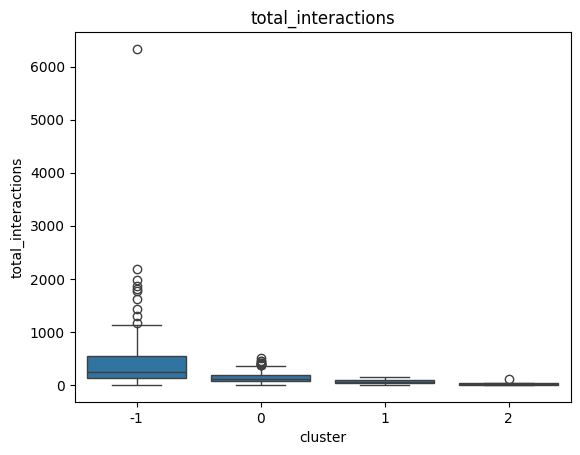

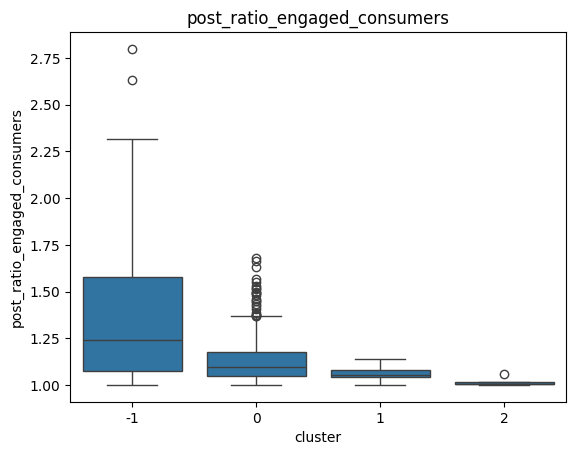

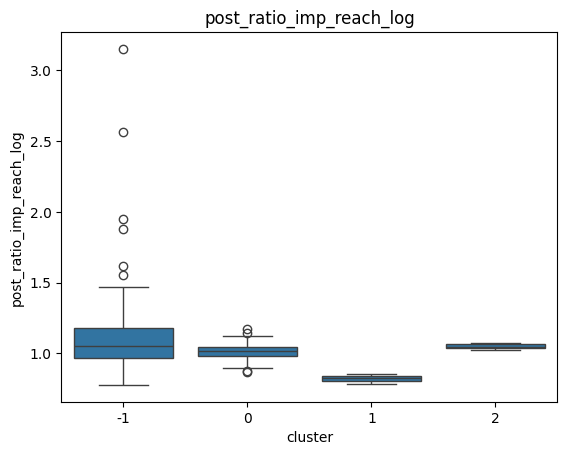

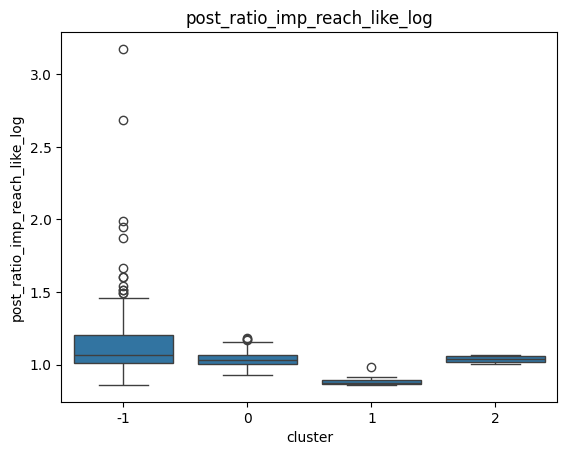

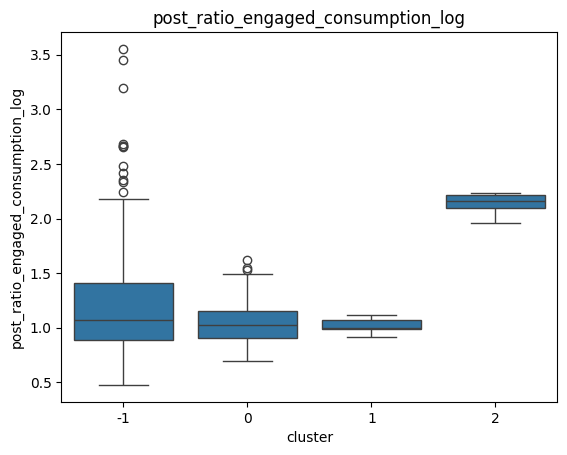

In [35]:
import seaborn as sns

for col in ['total_interactions', 'post_ratio_engaged_consumers', 'post_ratio_imp_reach_log',
            'post_ratio_imp_reach_like_log','post_ratio_engaged_consumption_log']:
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(col)
    plt.show()


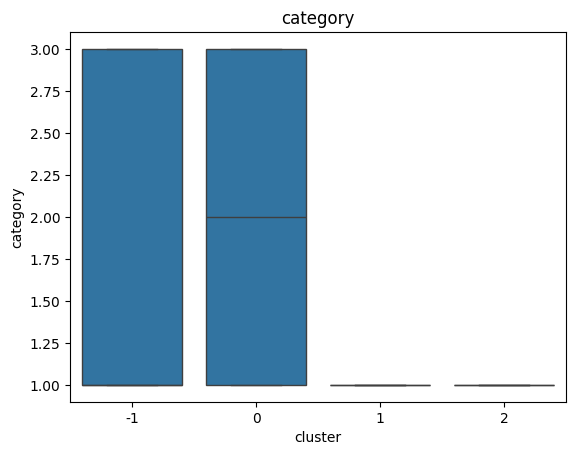

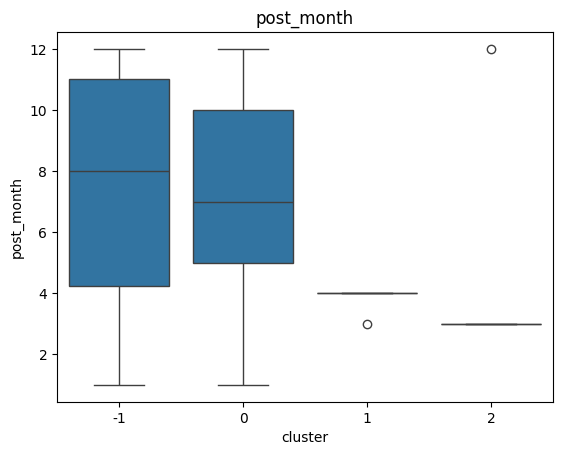

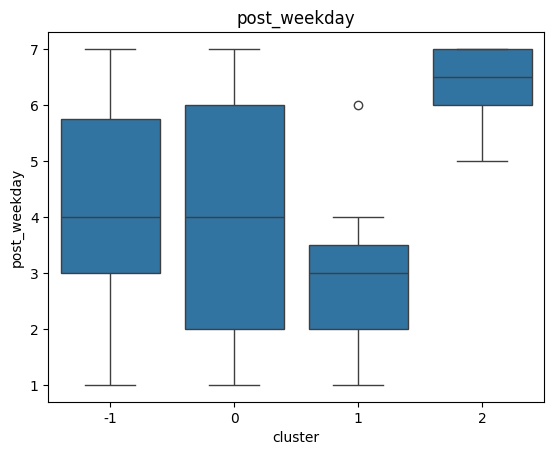

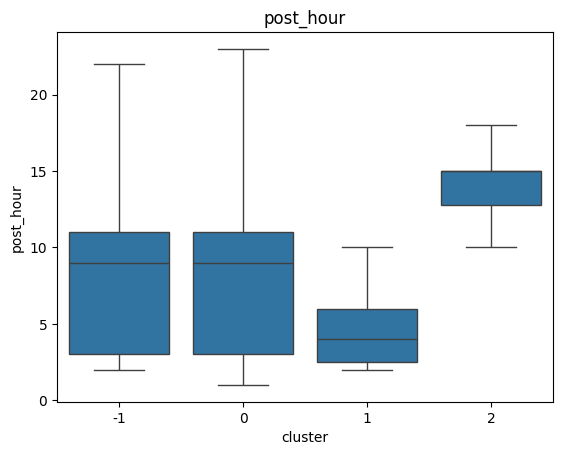

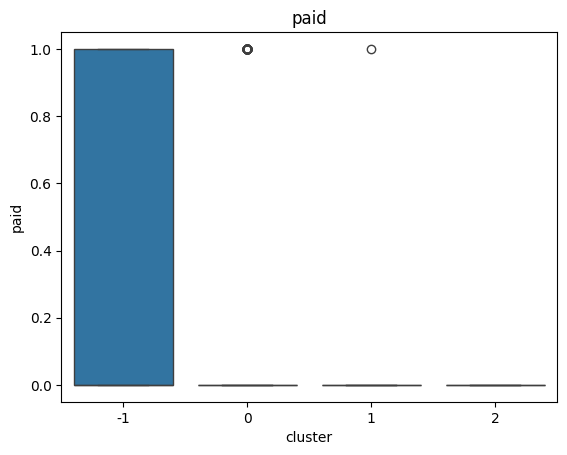

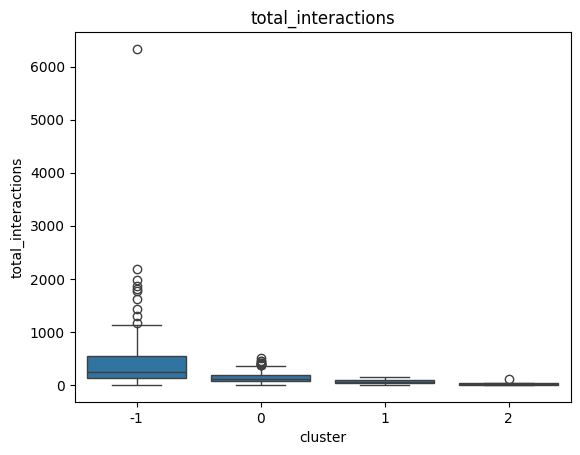

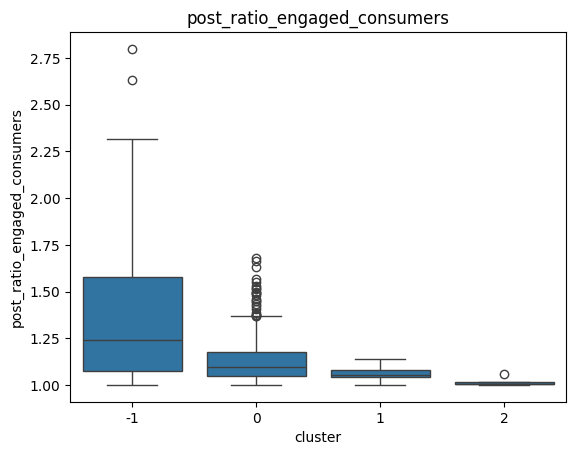

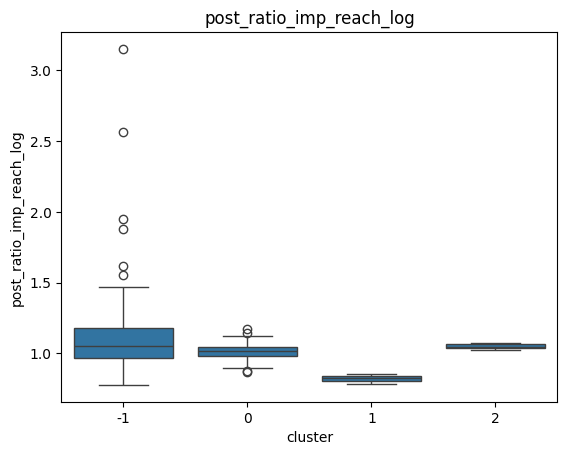

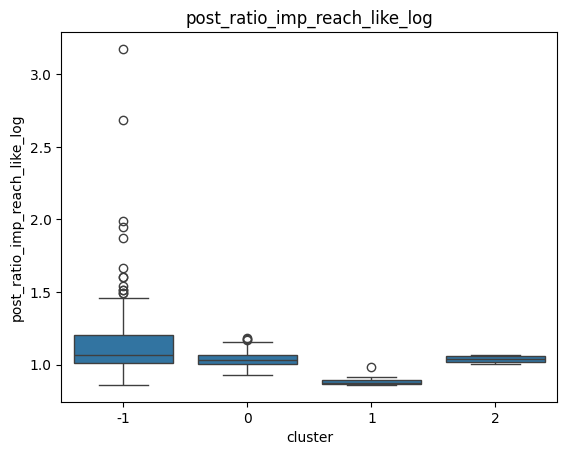

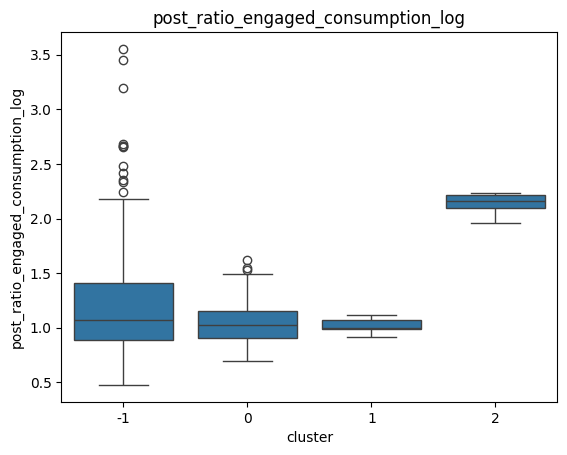

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns[1:-1]:  # all scaled features
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(col)
    plt.show()


In [38]:
from sklearn.metrics import silhouette_score as ss
ss(X_scaled,df['cluster'])

0.16584651606465814